In [2]:
import pyspark
spark = pyspark.sql.SparkSession.builder.appName("MyApp") \
    .config("spark.jars.packages", "io.delta:delta-core_2.11:0.6.0") \
    .getOrCreate()
sc = spark.sparkContext
sc.addPyFile("/usr/lib/spark/jars/delta-core_2.11-0.6.0.jar")
from delta.tables import *

In [7]:
RAW_DATA_BUCKET = "airborne-obj-detection-challenge-training"

In [14]:
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import os

keys = []

def load_voc_image_names(bucket_name, prefix):
    #s3 = boto3.resource('s3')
    s3 = boto3.resource('s3', config=Config(signature_version=UNSIGNED))
    bucket = s3.Bucket(bucket_name)
    files = []
    for obj in bucket.objects.filter(Prefix=os.path.join(prefix, "Images/1497343b9d90411db5c305e785be9032")):
        if obj.key.endswith('1497343b9d90411db5c305e785be9032.png'):
            files.append(obj.key)
    return(files)
    
V1_DATA_FOLDER = "part1"
keys = load_voc_image_names(RAW_DATA_BUCKET, V1_DATA_FOLDER)

In [15]:
keys

['part1/Images/1497343b9d90411db5c305e785be9032/15580183874585045861497343b9d90411db5c305e785be9032.png',
 'part1/Images/1497343b9d90411db5c305e785be9032/15580183875537740041497343b9d90411db5c305e785be9032.png',
 'part1/Images/1497343b9d90411db5c305e785be9032/15580183876600062681497343b9d90411db5c305e785be9032.png',
 'part1/Images/1497343b9d90411db5c305e785be9032/15580183877543050961497343b9d90411db5c305e785be9032.png',
 'part1/Images/1497343b9d90411db5c305e785be9032/15580183878607490521497343b9d90411db5c305e785be9032.png',
 'part1/Images/1497343b9d90411db5c305e785be9032/15580183879759957161497343b9d90411db5c305e785be9032.png',
 'part1/Images/1497343b9d90411db5c305e785be9032/15580183880504054731497343b9d90411db5c305e785be9032.png',
 'part1/Images/1497343b9d90411db5c305e785be9032/15580183881573929201497343b9d90411db5c305e785be9032.png',
 'part1/Images/1497343b9d90411db5c305e785be9032/15580183882514526951497343b9d90411db5c305e785be9032.png',
 'part1/Images/1497343b9d90411db5c305e785be903

In [16]:
import boto3
from botocore import UNSIGNED
from botocore.client import Config

s3 = boto3.resource('s3', config=Config(signature_version=UNSIGNED))
bucket = s3.Bucket("airborne-obj-detection-challenge-training")
files = []
for obj in bucket.objects.filter(Prefix="part1/Images/1497343b9d90411db5c305e785be9032"):
    if obj.key.endswith("15580183874585045861497343b9d90411db5c305e785be9032.png"):
        files.append(obj.key)

files

['part1/Images/1497343b9d90411db5c305e785be9032/15580183874585045861497343b9d90411db5c305e785be9032.png']

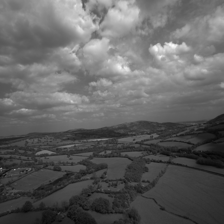

In [17]:
from PIL import Image
import io
for file in files:
    obj = s3.Object("airborne-obj-detection-challenge-training", file)
    temp_img = obj.get()['Body'].read()
    img = Image.open(io.BytesIO(temp_img))
    img1 = img.convert('RGB')
    img1 = img1.resize((224,224))
img1

In [20]:
gsutil mb gs://se513_test

SyntaxError: invalid syntax (<ipython-input-20-6a36263d41f2>, line 1)

In [19]:
REGION=us-central1-a
PROJECT_ID=drone-project
gcloud metastore services create demo-service \
    --hive-metastore-version=3.1.2 \
    --location=${REGION}

SyntaxError: invalid syntax (<ipython-input-19-18611fd01a6b>, line 3)

In [18]:
img1.write.mode("append").format("delta").save("gs://se513-drone-images/first-delta-table")

AttributeError: write